# Digit Recognition using Neural Network

**MNIST Digit Recognition**

MNIST Digits data is a Keras dataset that contains images of digits 0 to 9 and have labels associated with each image.

**Processing Steps**

- Check the version of Tensorflow and Keras
- Load training and test data including labels
- Normalize the images
- Plot few images after being normalized
- Create a Neural Network and build a model
- Train the model on the training dataset
- Evaluate the accuracy of the model using test dataset
- Plot the accuracy and loss for the model

In [1]:
%config IPCompleter.greedy = True

In [2]:
# importing packages/libraries
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import warnings

from tensorflow import keras

warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [3]:
# checking tensorflow version
tf.__version__, tf.keras.__version__

('2.1.0', '2.2.4-tf')

## Locating the Data

In [4]:
# defining the dataset
digits_mnist = keras.datasets.mnist

In [5]:
# defining datasets
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

## Exploring the Data

In [6]:
# getting size of the train data
print("Size: train images {}, train labels {}".format(train_images.shape, train_labels.shape))

Size: train images (60000, 28, 28), train labels (60000,)


In [7]:
# getting size of the test data
print("Size: test images {}, test labels {}".format(test_images.shape, test_labels.shape))

Size: test images (10000, 28, 28), test labels (10000,)


In [8]:
# looking at first 10 labels in training set
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

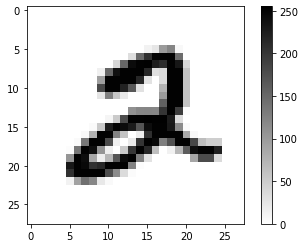

In [9]:
# plotting a image
plt.figure
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# checking images
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

## Normalizing the Images

In [11]:
# normalizing the values to be between 0 and 1; min-max normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# checking new values
train_images[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Plotting Normalized Images

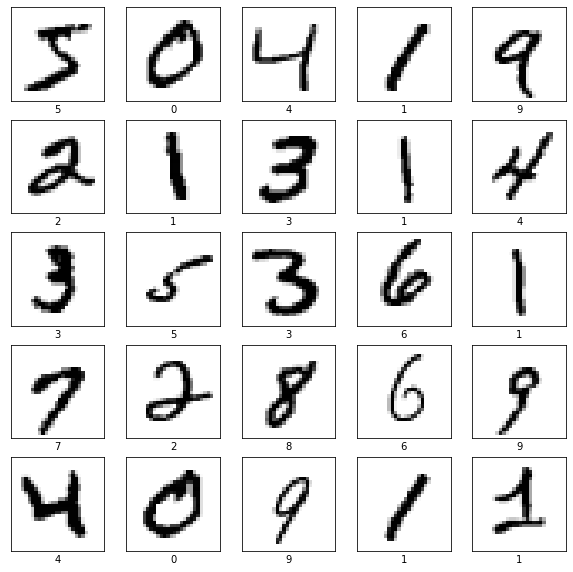

In [13]:
# viewing 25 of the grayscale images
plt.figure(figsize=(10,10))
for i in range(25):
    # printting 5 images per row
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Creating Neural Network

In [14]:
# creating Neural Network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
# instantiating and creating a Sequential() neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
# compiling the model with chosen parameters
model.compile(optimizer='adam', # keras.optimizers.Adam(learning_rate=0.001)
              loss='sparse_categorical_crossentropy',    # discrete numbers 0 - 9
              metrics=['accuracy'])

In [17]:
# getting model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trainning the Neural Network

In [18]:
# trainning the model and including a validation set (composed of 10% of the dataset)
# capturing the returned history enables you to plot the change in error/loss and accuracy over time
history = model.fit(train_images, train_labels, validation_split=0.1, 
                    epochs=15)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 3s 55us/sample - loss: 0.2759 - accuracy: 0.9210 - val_loss: 0.1242 - val_accuracy: 0.9648
Epoch 2/15
54000/54000 [==============================] - 3s 46us/sample - loss: 0.1236 - accuracy: 0.9637 - val_loss: 0.0915 - val_accuracy: 0.9733
Epoch 3/15
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0839 - accuracy: 0.9747 - val_loss: 0.0814 - val_accuracy: 0.9747
Epoch 4/15
54000/54000 [==============================] - 3s 48us/sample - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0833 - val_accuracy: 0.9748
Epoch 5/15
54000/54000 [==============================] - 3s 50us/sample - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch 6/15
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0371 - accuracy: 0.9891 - val_loss: 0.0810 - val_accuracy: 0.9773
Epoch 7/15
54000/54000 [==============================] -

In [19]:
# getting metrics
metrics_names = model.metrics_names

# Evaluating the Accuracy of the Model

In [20]:
# using the test images to evaluate the model on a set of unseen images
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0987 - accuracy: 0.9771
Test accuracy:  0.9771


In [21]:
# defining fucntion to plot
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

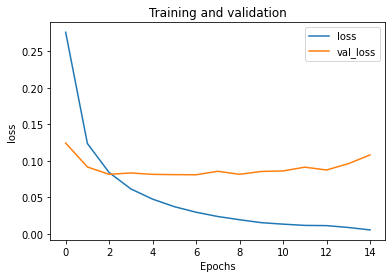

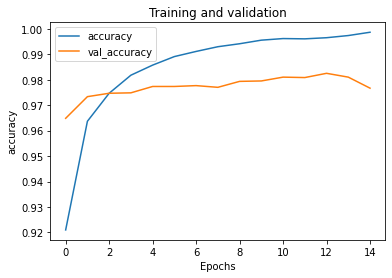

In [22]:
# plotting
for name in metrics_names:
    plot_graphs(history, name)